<a href="https://colab.research.google.com/github/2001aya2001alaa/Image-Classification-Graduation-Project/blob/main/Cats%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import image
import os
import cv2

from sklearn.model_selection import train_test_split

import imgaug as ia
import imgaug.augmenters as iaa

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

images list => Hold the data
Classes list => Hold the label of the data

In [2]:
classes = []
images = []

In [3]:
hflip= iaa.Fliplr(p=1.0)
rot1 = iaa.Affine(rotate=(-120,30))
crop1 = iaa.Crop(percent=(0.2))
noise = iaa.AdditiveGaussianNoise(10,30)
contrast = iaa.GammaContrast((0.5, 2.0))
contrast_lin = iaa.LinearContrast((0.6, 0.4))
contrast_sig = iaa.SigmoidContrast(gain=(5, 10), cutoff=(0.4, 0.6))
elastic = iaa.ElasticTransformation(alpha=50.0, sigma=4.5)

In [4]:
files = os.listdir('/content/sample_data/GP_ML/Cats')
len(files)

7

In [5]:
#breeds = ["American Curl", "Applehead Siamese", "Cornish Rex", "Havana", "Munchkin", "Nebelung", "Siberian"]

In [6]:
#len(breeds)

# **Load The Data**

In [7]:
pth = '/content/sample_data/GP_ML/Cats'
files = os.listdir(pth)
i = 0

for file in files:
    print(file)
    print(i)
    img_path = os.path.join(pth, file)
    file_list2 = os.listdir(img_path)
    for img in file_list2:
        img_path = img_path+'/'+img

        img_obj = cv2.imread(img_path)

        if img_obj is not None and img_obj.shape != ():
            img_obj = cv2.cvtColor(img_obj, cv2.COLOR_BGR2RGB)

            img_obj = cv2.resize(img_obj, (256, 256))
            #img_obj = img_obj/255
            images.append(img_obj)
            classes.append(i)

            #img_obj = (img_obj - np.mean(img_obj)) / np.std(img_obj)
            #images.append(img_obj)
            #classes.append(i)

            images.append(hflip.augment_image(img_obj))
            classes.append(i)

            images.append(crop1.augment_image(img_obj))
            classes.append(i)

            images.append(noise.augment_image(img_obj))
            classes.append(i)

            images.append(contrast_sig.augment_image(img_obj))
            classes.append(i)

            images.append(elastic.augment_image(img_obj))
            classes.append(i)

            img_path = os.path.join(pth, file)
    i = i + 1

ragdoll_cat
0
siamese_cat
1
persian_cat
2
mumbai_cat
3
abyssinian
4
american_shorthair
5
maine_coon
6


In [8]:
len(images)

6906

In [9]:
images[0].shape

(256, 256, 3)

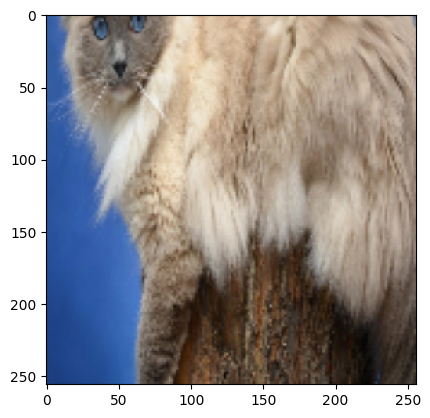

In [10]:
plt.imshow(images[14])

# **Split The Data**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images), np.array(classes), test_size = 0.2, random_state = 42)

In [12]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

5524
1382
5524
1382


In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5524, 256, 256, 3)
(5524,)
(1382, 256, 256, 3)
(1382,)


# **Model Architecture**

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu" , input_shape = (256,256, 3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1200,activation="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1200,activation ="relu"),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(7,activation = "softmax")
])

# **Train The Model**

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

y_train = tf.keras.utils.to_categorical(y_train, 7)
y_test = tf.keras.utils.to_categorical(y_test, 7)

model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
173/173 [==============================] - 1426s 8s/step - loss: 25.2838 - accuracy: 0.2667
Epoch 2/10
173/173 [==============================] - 1443s 8s/step - loss: 1.3088 - accuracy: 0.5398
Epoch 3/10
173/173 [==============================] - 1423s 8s/step - loss: 0.7634 - accuracy: 0.7618
Epoch 4/10
173/173 [==============================] - 1418s 8s/step - loss: 0.3962 - accuracy: 0.8901
Epoch 5/10
173/173 [==============================] - 1419s 8s/step - loss: 0.3660 - accuracy: 0.9229
Epoch 6/10
173/173 [==============================] - 1422s 8s/step - loss: 0.3519 - accuracy: 0.9037
Epoch 7/10
173/173 [==============================] - 1418s 8s/step - loss: 0.2882 - accuracy: 0.9220
Epoch 8/10
173/173 [==============================] - 1413s 8s/step - loss: 0.2019 - accuracy: 0.9509
Epoch 9/10
173/173 [==============================] - 1415s 8s/step - loss: 0.2107 - accuracy: 0.9613
Epoch 10/10
173/173 [==============================] - 1413s 8s/step - loss: 0.15

# **Evaluate The Model**

In [16]:
loss, acc = model.evaluate(x_test, y_test)
print("Loss value = ", loss)
print("The accuracy = ", acc*100, "%")

44/44 [==============================] - 73s 2s/step - loss: 1.7516 - accuracy: 0.6143
Loss value =  1.7515884637832642
The accuracy =  61.4327073097229 %


# **Save The Model**

In [22]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# **Save The Model**

In [17]:
import pickle

with open('model_3.pkl', 'wb') as f:
    pickle.dump(model, f)

In [18]:
model.save('model_3.h5')

In [19]:
#model.save_weights('my_model_weights.h5')

In [23]:
#from tensorflow.keras.models import load_model

# Load the saved model from a file
#loaded_model = load_model('model3.pkl')

In [24]:
#loss, acc = loaded_model.evaluate(x_test, y_test)
#print("Loss value = ", loss)
#print("The accuracy = ", acc*100, "%")

In [25]:
#! mkdir ~/.kaggle

In [26]:
#! cp /content/sample_data/kaggle.json ~/.kaggle/

In [27]:
#! chmod 600 ~/.kaggle/kaggle.json

In [28]:
#!ls -lha ~/.kaggle/kaggle.json

In [29]:
#!pip install -q kaggle # installing the kaggle package

In [30]:
#!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed

In [31]:
#!cp ~/.kaggle/kaggle.json ~/.kaggle/ # move the key to the folder

In [32]:
#!pwd # checking the present working directory

In [33]:
#!chmod 600 ~/.kaggle/kaggle.json

In [34]:
#!kaggle datasets download -d zippyz/cats-and-dogs-breeds-classification-oxford-dataset

In [35]:
#!ls /content/Dataset.zip

In [36]:
#! unzip /content/Data.zip -d Data

In [37]:
#!kaggle datasets download -d shawngano/gano-cat-breed-image-collection